In [23]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Joel Osei-Asamoah\OneDrive - Ashesi University\Faculty Intern\Machine Learning\Labs\labs_week_2_linear_regression\data.csv')

In [25]:
# Remove commas from 'Land Price (GHS)' and convert it to float
data['Land Price (GHS)'] = data['Land Price (GHS)'].replace({',': ''}, regex=True).astype(float)

In [26]:
# Separate features (Size, Distance) and target (Price)
X = data[['Size of Plot (sq. meters)', 'Distance from Airport (km)']].values
y = data['Land Price (GHS)'].values
# Normalize the features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

In [27]:
# Add a column of 1's for the bias term (theta_0)
m = len(y)  # number of training examples
X_b = np.c_[np.ones((m, 1)), X_norm]  # Add bias term (intercept)

In [28]:
# Define the cost function (Mean Squared Error)
def compute_cost(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)  # Predictions based on current theta
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

In [29]:
# Define the gradient descent function
def gradient_descent(X_b, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)  # To store the cost for each iteration
    
    for i in range(iterations):
        predictions = X_b.dot(theta)
        gradients = (1/m) * X_b.T.dot(predictions - y)
        theta = theta - alpha * gradients
        cost_history[i] = compute_cost(X_b, y, theta)
        
    return theta, cost_history

In [30]:
# Gradient Descent parameters
alpha = 0.2  # Learning rate
iterations = 1000  # Number of iterations
theta = np.zeros(X_b.shape[1])  # Initialize parameters (theta) with zeros

# Run Gradient Descent
theta_optimal, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)

# Print final theta values and final cost
print(f"Optimal theta: {theta_optimal}")
print(f"Final cost: {cost_history[-1]}")

Optimal theta: [32822.12218286 10766.26397493  -414.48517691]
Final cost: 875734.1410665334


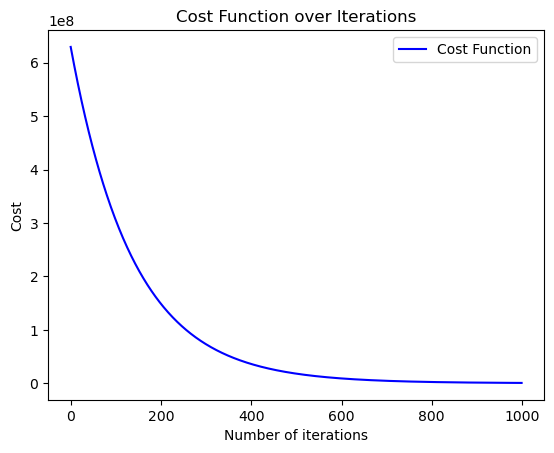

In [31]:
# Plot cost function history
plt.plot(range(iterations), cost_history, 'b-', label="Cost Function")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.legend()
plt.show()

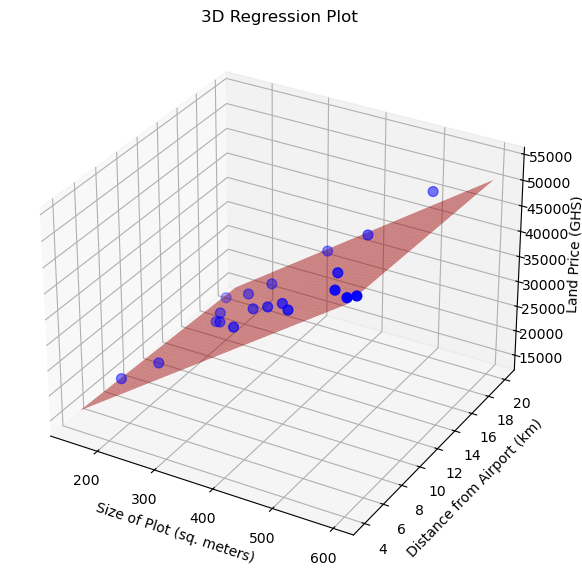

In [32]:
# Create a figure for 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label="Actual Prices", s=50)

# Create a grid of points to plot the regression plane
theta0_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
theta1_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

# Calculate the predicted prices using the optimal theta
X_grid_b = np.c_[np.ones((theta0_grid.size, 1)), (theta0_grid.flatten() - X_mean[0]) / X_std[0], 
                 (theta1_grid.flatten() - X_mean[1]) / X_std[1]]
predicted_prices_grid = X_grid_b.dot(theta_optimal).reshape(theta0_grid.shape)

# Plot the regression plane
ax.plot_surface(theta0_grid, theta1_grid, predicted_prices_grid, color='red', alpha=0.5)

# Labels and title
ax.set_xlabel('Size of Plot (sq. meters)')
ax.set_ylabel('Distance from Airport (km)')
ax.set_zlabel('Land Price (GHS)')
ax.set_title('3D Regression Plot')

plt.show()

In [33]:
new_data = np.array([[600, 5]])  # Example size and distance

# Normalize the new input data
new_data_norm = (new_data - X_mean) / X_std
new_data_b = np.c_[np.ones((1, 1)), new_data_norm]  # Add bias term

# Predict using the optimal theta
predicted_price = new_data_b.dot(theta_optimal)
print(f"Predicted land price: {predicted_price[0]}")

Predicted land price: 52235.381194819136
